In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [45]:
from joblib import dump

In [46]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

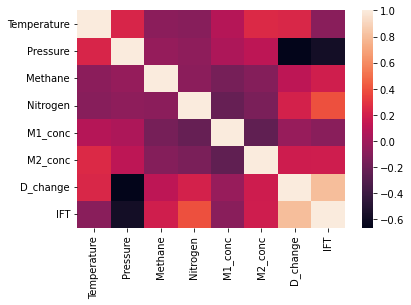

In [47]:
sns.heatmap(df.corr())

In [48]:
X= df. drop(['IFT','Phase'],axis=1)

In [49]:
y=df.IFT.astype(float)

In [50]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])

In [51]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
X.index=x_cat.index

In [54]:
X=pd.concat([X,x_cat],axis=1)

In [55]:
X

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
X=X.drop(["Salttype"],axis=1)

In [57]:
y.index=X.index

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist,
    n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 161}


In [130]:
# Create a Random Forest Regressor
from sklearn.metrics import mean_squared_error
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=100,max_features='auto', min_samples_leaf=2,min_samples_split=2)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.5172765755290523


In [131]:
rf_regressor.score(X_train,y_train)

0.9924822065625034

In [132]:
rf_regressor.score(X_test,y_test)

0.97455429220362

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [135]:
train_mse= mean_squared_error(y_train, rf_regressor.predict(X_train))
train_mae= mean_absolute_error(y_train, rf_regressor.predict(X_train))

In [136]:
test_mse=mean_squared_error(y_test,y_pred)
test_mae=mean_absolute_error(y_test,y_pred)

In [137]:
train_mse,test_mse

(1.011808882265079, 3.5172765755290523)

In [138]:
train_mae, test_mae

(0.6808409686935222, 1.3314876863037355)

In [139]:
df=pd.DataFrame(y_test) 
df

,IFT
1611,29.52
949,33.50
680,30.50
141,25.00
1620,34.50
...,...
8,27.86
218,56.70
366,43.02
963,62.10


In [140]:
d2=pd.DataFrame(y_pred, columns=['IFT_pred'])
d2.index=df.index

In [141]:
df=pd.concat([df,d2],axis=1)

In [142]:
df.to_csv("rf_regressor_y_test_v_y_test_pred_1.csv")

In [143]:
df=pd.DataFrame(y_train) 
df

,IFT
1460,58.97
1304,35.89
687,33.80
1540,64.00
447,47.87
...,...
1142,68.52
998,55.10
1725,36.78
206,31.30


In [145]:
d2=pd.DataFrame(rf_regressor.predict(X_train), columns=['IFT_pred'])
d2.index=df.index

In [146]:
df=pd.concat([df,d2],axis=1)

In [147]:
df.to_csv("rf_regressor_compare1.csv")

In [148]:
from joblib import dump

In [ ]:
dump(extra_trees_model,"rf_regressor_1.pkl")